In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from yellowbrick.target import FeatureCorrelation
from yellowbrick.classifier import ClassificationReport
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.metrics import classification_report

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd 'drive/MyDrive/Hacklytics'

/content/drive/MyDrive/Hacklytics


In [4]:
data = pd.read_csv("dataset.csv")
data = data.drop(columns=["CHARSET","REMOTE_IPS", "TCP_CONVERSATION_EXCHANGE"])

In [5]:
# data = data[data['TCP_CONVERSATION_EXCHANGE']<400]
data = data.drop(columns=["URL"])

In [6]:
n_data = data.drop(columns=["SERVER", "WHOIS_COUNTRY", "WHOIS_STATEPRO", "WHOIS_REGDATE", "WHOIS_UPDATED_DATE"])
n_data.head()

,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CONTENT_LENGTH,DIST_REMOTE_TCP_PORT,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
0,16,7,263.0,0,700,9,10,1153,832,9,2.0,1
1,16,6,15087.0,7,1230,17,19,1265,1230,17,0.0,0
2,16,6,324.0,0,0,0,0,0,0,0,0.0,0
3,17,6,162.0,22,3812,39,37,18784,4380,39,8.0,0
4,17,6,124140.0,2,4278,61,62,129889,4586,61,4.0,0


In [7]:
data = pd.get_dummies(data)
data.head()

,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CONTENT_LENGTH,DIST_REMOTE_TCP_PORT,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type,SERVER_.V01 Apache,SERVER_294,SERVER_ATS,SERVER_ATS/5.3.0,SERVER_Aeria Games & Entertainment,SERVER_AkamaiGHost,SERVER_AmazonS3,SERVER_Apache,SERVER_Apache-Coyote/1.1,SERVER_Apache/1.3.27 (Unix) (Red-Hat/Linux) mod_perl/1.26 PHP/4.3.3 FrontPage/5.0.2 mod_ssl/2.8.12 OpenSSL/0.9.6b,SERVER_Apache/1.3.27 (Unix) PHP/4.4.1,SERVER_Apache/1.3.31 (Unix) PHP/4.3.9 mod_perl/1.29 rus/PL30.20,SERVER_Apache/1.3.33 (Unix) mod_ssl/2.8.24 OpenSSL/0.9.7e-p1 PHP/4.4.8,SERVER_Apache/1.3.34 (Unix) PHP/4.4.4,SERVER_Apache/1.3.37 (Unix) mod_perl/1.29 mod_ssl/2.8.28 OpenSSL/0.9.7e-p1,SERVER_Apache/1.3.39 (Unix) PHP/5.2.5 mod_auth_passthrough/1.8 mod_bwlimited/1.4 mod_log_bytes/1.2 mod_gzip/1.3.26.1a FrontPage/5.0.2.2635 DAV/1.0.3 mod_ssl/2.8.30 OpenSSL/0.9.7a,SERVER_Apache/1.3.42 Ben-SSL/1.60 (Unix) mod_gzip/1.3.26.1a mod_fastcgi/2.4.6 mod_throttle/3.1.2 Chili!Soft-ASP/3.6.2 FrontPage/5.0.2.2635 mod_perl/1.31 PHP/4.4.9,SERVER_Apache/2,SERVER_Apache/2.0.52 (Red Hat),SERVER_Apache/2.0.63 (Unix) mod_ssl/2.0.63 OpenSSL/0.9.8e-fips-rhel5 mod_auth_passthrough/2.1 mod_bwlimited/1.4 PHP/5.3.6,SERVER_Apache/2.2.0 (Fedora),SERVER_Apache/2.2.10 (Linux/SUSE),SERVER_Apache/2.2.11 (Unix) PHP/5.2.6,SERVER_Apache/2.2.13 (Unix) mod_ssl/2.2.13 OpenSSL/0.9.8e-fips-rhel5 mod_auth_passthrough/2.1 mod_bwlimited/1.4 PHP/5.2.10,SERVER_Apache/2.2.14 (FreeBSD) mod_ssl/2.2.14 OpenSSL/0.9.8y DAV/2 PHP/5.2.12 with Suhosin-Patch,SERVER_Apache/2.2.14 (Ubuntu),SERVER_Apache/2.2.14 (Unix) mod_ssl/2.2.14 OpenSSL/0.9.8a,SERVER_Apache/2.2.14 (Unix) mod_ssl/2.2.14 OpenSSL/0.9.8e-fips-rhel5,...,WHOIS_UPDATED_DATE_7/12/2016 0:00,WHOIS_UPDATED_DATE_8/01/2016 0:00,WHOIS_UPDATED_DATE_8/01/2017 0:00,WHOIS_UPDATED_DATE_8/02/2017 0:00,WHOIS_UPDATED_DATE_8/03/2017 0:00,WHOIS_UPDATED_DATE_8/04/2017 0:00,WHOIS_UPDATED_DATE_8/04/2017 1:39,WHOIS_UPDATED_DATE_8/06/2015 0:00,WHOIS_UPDATED_DATE_8/08/2015 0:00,WHOIS_UPDATED_DATE_8/08/2016 0:00,WHOIS_UPDATED_DATE_8/09/2016 0:00,WHOIS_UPDATED_DATE_8/10/2014 0:00,WHOIS_UPDATED_DATE_8/11/2014 0:00,WHOIS_UPDATED_DATE_8/11/2016 0:00,WHOIS_UPDATED_DATE_8/12/2014 0:00,WHOIS_UPDATED_DATE_8/12/2015 0:00,WHOIS_UPDATED_DATE_8/12/2016 0:00,WHOIS_UPDATED_DATE_8/12/2016 14:01,WHOIS_UPDATED_DATE_9/01/2017 10:11,WHOIS_UPDATED_DATE_9/01/2017 16:53,WHOIS_UPDATED_DATE_9/02/2017 0:00,WHOIS_UPDATED_DATE_9/03/2015 0:00,WHOIS_UPDATED_DATE_9/03/2017 0:00,WHOIS_UPDATED_DATE_9/04/2014 0:00,WHOIS_UPDATED_DATE_9/04/2017 0:00,WHOIS_UPDATED_DATE_9/05/2016 0:00,WHOIS_UPDATED_DATE_9/06/2016 0:00,WHOIS_UPDATED_DATE_9/07/2016 0:00,WHOIS_UPDATED_DATE_9/08/2016 0:00,WHOIS_UPDATED_DATE_9/09/2013 0:00,WHOIS_UPDATED_DATE_9/09/2015 0:00,WHOIS_UPDATED_DATE_9/09/2015 20:47,WHOIS_UPDATED_DATE_9/09/2016 0:00,WHOIS_UPDATED_DATE_9/10/2015 0:00,WHOIS_UPDATED_DATE_9/11/2015 0:00,WHOIS_UPDATED_DATE_9/11/2016 0:00,WHOIS_UPDATED_DATE_9/12/2015 0:00,WHOIS_UPDATED_DATE_9/12/2015 14:43,WHOIS_UPDATED_DATE_9/12/2016 0:00,WHOIS_UPDATED_DATE_None
0,16,7,263.0,0,700,9,10,1153,832,9,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,16,6,15087.0,7,1230,17,19,1265,1230,17,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,16,6,324.0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,17,6,162.0,22,3812,39,37,18784,4380,39,8.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,17,6,124140.0,2,4278,61,62,129889,4586,61,4.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [8]:
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

In [9]:
clean_dataset(data)
data.head()

,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CONTENT_LENGTH,DIST_REMOTE_TCP_PORT,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type,SERVER_.V01 Apache,SERVER_294,SERVER_ATS,SERVER_ATS/5.3.0,SERVER_Aeria Games & Entertainment,SERVER_AkamaiGHost,SERVER_AmazonS3,SERVER_Apache,SERVER_Apache-Coyote/1.1,SERVER_Apache/1.3.27 (Unix) (Red-Hat/Linux) mod_perl/1.26 PHP/4.3.3 FrontPage/5.0.2 mod_ssl/2.8.12 OpenSSL/0.9.6b,SERVER_Apache/1.3.27 (Unix) PHP/4.4.1,SERVER_Apache/1.3.31 (Unix) PHP/4.3.9 mod_perl/1.29 rus/PL30.20,SERVER_Apache/1.3.33 (Unix) mod_ssl/2.8.24 OpenSSL/0.9.7e-p1 PHP/4.4.8,SERVER_Apache/1.3.34 (Unix) PHP/4.4.4,SERVER_Apache/1.3.37 (Unix) mod_perl/1.29 mod_ssl/2.8.28 OpenSSL/0.9.7e-p1,SERVER_Apache/1.3.39 (Unix) PHP/5.2.5 mod_auth_passthrough/1.8 mod_bwlimited/1.4 mod_log_bytes/1.2 mod_gzip/1.3.26.1a FrontPage/5.0.2.2635 DAV/1.0.3 mod_ssl/2.8.30 OpenSSL/0.9.7a,SERVER_Apache/1.3.42 Ben-SSL/1.60 (Unix) mod_gzip/1.3.26.1a mod_fastcgi/2.4.6 mod_throttle/3.1.2 Chili!Soft-ASP/3.6.2 FrontPage/5.0.2.2635 mod_perl/1.31 PHP/4.4.9,SERVER_Apache/2,SERVER_Apache/2.0.52 (Red Hat),SERVER_Apache/2.0.63 (Unix) mod_ssl/2.0.63 OpenSSL/0.9.8e-fips-rhel5 mod_auth_passthrough/2.1 mod_bwlimited/1.4 PHP/5.3.6,SERVER_Apache/2.2.0 (Fedora),SERVER_Apache/2.2.10 (Linux/SUSE),SERVER_Apache/2.2.11 (Unix) PHP/5.2.6,SERVER_Apache/2.2.13 (Unix) mod_ssl/2.2.13 OpenSSL/0.9.8e-fips-rhel5 mod_auth_passthrough/2.1 mod_bwlimited/1.4 PHP/5.2.10,SERVER_Apache/2.2.14 (FreeBSD) mod_ssl/2.2.14 OpenSSL/0.9.8y DAV/2 PHP/5.2.12 with Suhosin-Patch,SERVER_Apache/2.2.14 (Ubuntu),SERVER_Apache/2.2.14 (Unix) mod_ssl/2.2.14 OpenSSL/0.9.8a,SERVER_Apache/2.2.14 (Unix) mod_ssl/2.2.14 OpenSSL/0.9.8e-fips-rhel5,...,WHOIS_UPDATED_DATE_7/12/2016 0:00,WHOIS_UPDATED_DATE_8/01/2016 0:00,WHOIS_UPDATED_DATE_8/01/2017 0:00,WHOIS_UPDATED_DATE_8/02/2017 0:00,WHOIS_UPDATED_DATE_8/03/2017 0:00,WHOIS_UPDATED_DATE_8/04/2017 0:00,WHOIS_UPDATED_DATE_8/04/2017 1:39,WHOIS_UPDATED_DATE_8/06/2015 0:00,WHOIS_UPDATED_DATE_8/08/2015 0:00,WHOIS_UPDATED_DATE_8/08/2016 0:00,WHOIS_UPDATED_DATE_8/09/2016 0:00,WHOIS_UPDATED_DATE_8/10/2014 0:00,WHOIS_UPDATED_DATE_8/11/2014 0:00,WHOIS_UPDATED_DATE_8/11/2016 0:00,WHOIS_UPDATED_DATE_8/12/2014 0:00,WHOIS_UPDATED_DATE_8/12/2015 0:00,WHOIS_UPDATED_DATE_8/12/2016 0:00,WHOIS_UPDATED_DATE_8/12/2016 14:01,WHOIS_UPDATED_DATE_9/01/2017 10:11,WHOIS_UPDATED_DATE_9/01/2017 16:53,WHOIS_UPDATED_DATE_9/02/2017 0:00,WHOIS_UPDATED_DATE_9/03/2015 0:00,WHOIS_UPDATED_DATE_9/03/2017 0:00,WHOIS_UPDATED_DATE_9/04/2014 0:00,WHOIS_UPDATED_DATE_9/04/2017 0:00,WHOIS_UPDATED_DATE_9/05/2016 0:00,WHOIS_UPDATED_DATE_9/06/2016 0:00,WHOIS_UPDATED_DATE_9/07/2016 0:00,WHOIS_UPDATED_DATE_9/08/2016 0:00,WHOIS_UPDATED_DATE_9/09/2013 0:00,WHOIS_UPDATED_DATE_9/09/2015 0:00,WHOIS_UPDATED_DATE_9/09/2015 20:47,WHOIS_UPDATED_DATE_9/09/2016 0:00,WHOIS_UPDATED_DATE_9/10/2015 0:00,WHOIS_UPDATED_DATE_9/11/2015 0:00,WHOIS_UPDATED_DATE_9/11/2016 0:00,WHOIS_UPDATED_DATE_9/12/2015 0:00,WHOIS_UPDATED_DATE_9/12/2015 14:43,WHOIS_UPDATED_DATE_9/12/2016 0:00,WHOIS_UPDATED_DATE_None
0,16,7,263.0,0,700,9,10,1153,832,9,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,16,6,15087.0,7,1230,17,19,1265,1230,17,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,16,6,324.0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,17,6,162.0,22,3812,39,37,18784,4380,39,8.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,17,6,124140.0,2,4278,61,62,129889,4586,61,4.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [10]:
clean_dataset(n_data)
n_data.head()

,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CONTENT_LENGTH,DIST_REMOTE_TCP_PORT,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
0,16,7,263.0,0,700,9,10,1153,832,9,2.0,1
1,16,6,15087.0,7,1230,17,19,1265,1230,17,0.0,0
2,16,6,324.0,0,0,0,0,0,0,0,0.0,0
3,17,6,162.0,22,3812,39,37,18784,4380,39,8.0,0
4,17,6,124140.0,2,4278,61,62,129889,4586,61,4.0,0


In [11]:
y = n_data["Type"]
x = n_data.iloc[:, :-1]

In [12]:
yr = data["Type"]
xr = data.iloc[:,:-1]
xr_train, xr_test, yr_train, yr_test = train_test_split(xr, yr, test_size=0.1)

/usr/local/lib/python3.6/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


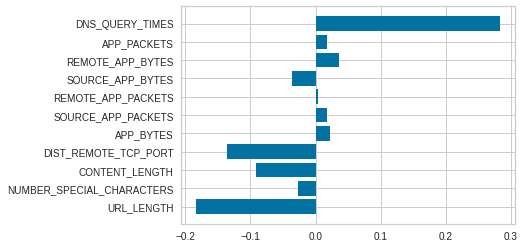

In [14]:
visualizer = FeatureCorrelation()
visualizer.fit(x, y)
plt.savefig('corr.eps', format='eps', dpi=600)
# visualizer.show()

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y)
scaler = StandardScaler()

In [ ]:
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

KNN

In [ ]:
knn = KNeighborsClassifier(n_neighbors=20)
knn = knn.fit(xr_train, yr_train)
y_pred_knn = knn.predict(xr_test)

C:\Users\Vladi\Anaconda3\lib\site-packages\sklearn\base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


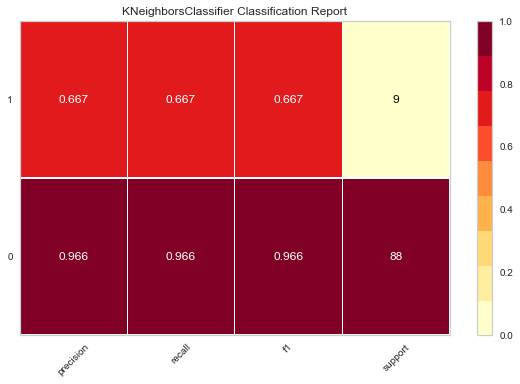

{'precision': {0: 0.9659090909090909, 1: 0.6666666666666666},
 'recall': {0: 0.9659090909090909, 1: 0.6666666666666666},
 'f1': {0: 0.9659090909090909, 1: 0.6666666666666666},
 'support': {0: 0.9072164948453608, 1: 0.09278350515463918}}

In [ ]:
c = ClassificationReport(knn, support=True)
c.fit(xr_train, yr_train)
c.score(xr_test, yr_test)
c.show()
c.scores_

In [ ]:
print(classification_report(yr_test, y_pred_knn, labels=np.unique(y_pred_knn)))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        88
           1       0.67      0.67      0.67         9

    accuracy                           0.94        97
   macro avg       0.82      0.82      0.82        97
weighted avg       0.94      0.94      0.94        97



C:\Users\Vladi\AppData\Roaming\Python\Python37\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


svm

In [ ]:
svmm = svm.SVC(kernel="linear", probability = True)
svmm = svmm.fit(x_train, y_train)
y_pred_svmm = svmm.predict(x_test)

C:\Users\Vladi\AppData\Roaming\Python\Python37\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


C:\Users\Vladi\AppData\Roaming\Python\Python37\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
C:\Users\Vladi\Anaconda3\lib\site-packages\sklearn\base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
C:\Users\Vladi\Anaconda3\lib\site-packages\sklearn\base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
C:\Users\Vladi\Anaconda3\lib\site-packages\sklearn\base.py:213: FutureWarning: From version 0.24, get_params will raise an Att

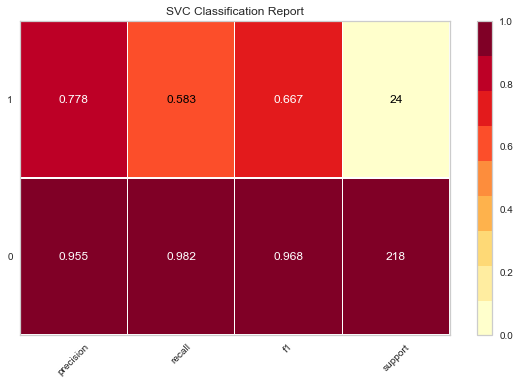

{'precision': {0: 0.9553571428571429, 1: 0.7777777777777778},
 'recall': {0: 0.981651376146789, 1: 0.5833333333333334},
 'f1': {0: 0.9683257918552036, 1: 0.6666666666666666},
 'support': {0: 0.9008264462809917, 1: 0.09917355371900827}}

In [ ]:
c = ClassificationReport(svmm, support=True)
c.fit(x_train, y_train)
c.score(x_test, y_test)
c.show()
c.scores_

Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [ ]:
rf = RandomForestClassifier(n_estimators=20, random_state=42)
rf.fit(xr_train, yr_train)
y_pred_rf = rf.predict(xr_test)

C:\Users\Vladi\AppData\Roaming\Python\Python37\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
import warnings
warnings.filterwarnings('always')
print(classification_report(yr_test, y_pred_rf, labels=np.unique(y_pred_rf)))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99        88
           1       1.00      0.89      0.94         9

    accuracy                           0.99        97
   macro avg       0.99      0.94      0.97        97
weighted avg       0.99      0.99      0.99        97



C:\Users\Vladi\AppData\Roaming\Python\Python37\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
y_pred_test_hat = rf.predict(xr_test)

display(pd.DataFrame(classification_report(yr_test, y_pred_gnb, output_dict=True)).transpose())

C:\Users\Vladi\AppData\Roaming\Python\Python37\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,f1-score,precision,recall,support
0,0.495726,1.000000,0.329545,88.000000
1,0.233766,0.132353,1.000000,9.000000
accuracy,0.391753,0.391753,0.391753,0.391753
macro avg,0.364746,0.566176,0.664773,97.000000
weighted avg,0.471421,0.919497,0.391753,97.000000


The data from above is what will return the train function. 

Random Forest is our main Algorithm